In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway 
import warnings

warnings.filterwarnings('ignore')

### Load TelCo Dataset and do a Basic Inspection

In [2]:
df = pd.read_csv('train.csv')
display(df.head(), df.tail(), df.shape)

id  Temperature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   
3   3           35        62        54     Sandy     Barley        39   
4   4           35        58        43       Red      Paddy        37   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
3         12            4        10-26-26  
4          2           16             DAP

id  Temperature  Humidity  Moisture Soil Type    Crop Type  \
749995  749995           25        69        30    Clayey        Maize   
749996  749996           37        64        58     Loamy    Sugarcane   
749997  749997           35        68        59     Sandy  Ground Nuts   
749998  749998           31        68        29       Red       Cotton   
749999  749999           33        55        29     Loamy       Cotton   

        Nitrogen  Potassium  Phosphorous Fertilizer Name  
749995         8         16            6           28-28  
749996        38          8           20        17-17-17  
749997         6         11           29        10-26-26  
749998         9         11           12           20-20  
749999         4         10            9            Urea

(750000, 10)

In [3]:
#We create a summary function to do a basic statistical analysis of our Dataset.

from scipy.stats import skew, kurtosis

def better_summary(telco_df):
    summary_data = []

    for col in telco_df.columns:
        col_data = telco_df[col]
        col_summary = {
            "Column": col,
            "Data Type": col_data.dtype,
            "Non-Null Count": col_data.notnull().sum(),
            "Missing Count": col_data.isnull().sum(),
            "Missing %": col_data.isnull().mean() * 100,
            "Unique Count": col_data.nunique()
        }

        if pd.api.types.is_numeric_dtype(col_data):
            col_summary.update({
                "Min": col_data.min(),
                "Max": col_data.max(),
                "Mean": col_data.mean(),
                "Median": col_data.median(),
                "Std Dev": col_data.std(),
                "Skewness": skew(col_data.dropna()),
                "Kurtosis": kurtosis(col_data.dropna())
            })
        else:
            mode = col_data.mode().iloc[0] if not col_data.mode().empty else np.nan
            mode_freq = col_data.value_counts().iloc[0] if not col_data.value_counts().empty else np.nan
            col_summary.update({
                "Top (Mode)": mode,
                "Freq": mode_freq
            })

        summary_data.append(col_summary)

    return pd.DataFrame(summary_data).style.format(precision=2).background_gradient(cmap="Blues")

summary = better_summary(df)
summary

In [4]:
#Let's see what our Categorical Columns look like
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    print(df[col].value_counts())
    print("---" * 8)


Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64
------------------------
Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64
------------------------
Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64
------------------------


#### Exploratory Data Analysis & Visualization

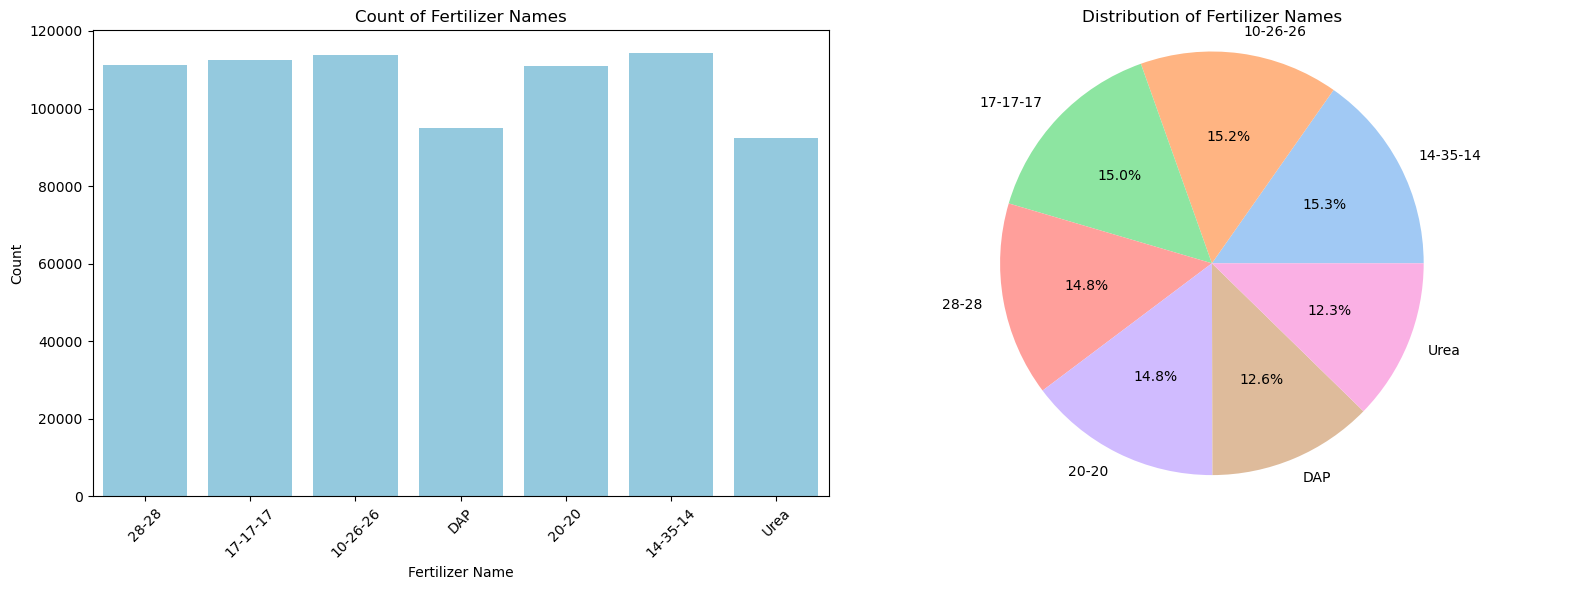

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(ax=axes[0], data=df, x='Fertilizer Name', color='skyblue')
axes[0].set_title('Count of Fertilizer Names')
axes[0].set_xlabel('Fertilizer Name')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

counts = df['Fertilizer Name'].value_counts()
axes[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1].set_title('Distribution of Fertilizer Names')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

#### Visualization Categorical Columns and Fertilizer Name


📊 Fertilizer Name by Soil Type


Fertilizer Name  10-26-26  14-35-14  17-17-17  20-20  28-28    DAP   Urea
Soil Type                                                                
Black               23061     23656     22304  21721  21196  20501  18517
Clayey              23592     22258     22771  22508  22762  17278  17213
Loamy               22822     22571     22249  22138  21522  17476  17072
Red                 21725     22779     22141  21614  21679  19077  19087
Sandy               22687     23172     22988  22908  23999  20528  20428

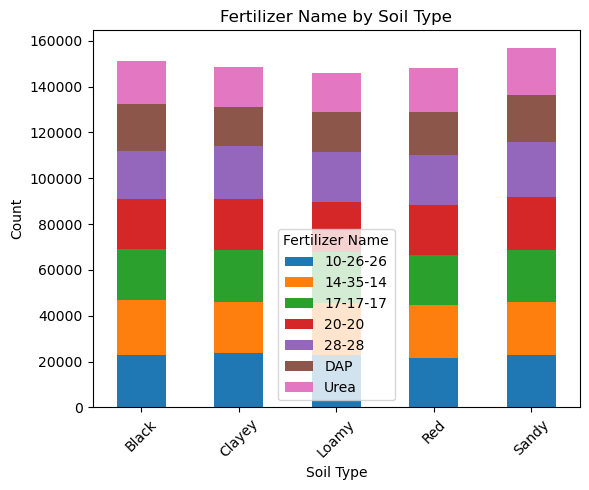


📊 Fertilizer Name by Crop Type


Fertilizer Name  10-26-26  14-35-14  17-17-17  20-20  28-28    DAP   Urea
Crop Type                                                                
Barley               9447      9809      9901   9500   9684   8068   8636
Cotton              10204      9953     10337  10013   9862   9427   9375
Ground Nuts          9087      9582      9468   9322   9715   6802   6933
Maize                9821      9546      8722   8615   9232   8289   8344
Millets              9300     10121      9494   9541   9916   8148   8771
Oil seeds            9838     10038      9058   9502   9902   8153   7693
Paddy               12812     12651     12661  11580  13264  11828  10958
Pulses              12090     13064     13138  12530  10761   8375   8222
Sugarcane           10399     10410     10003  10331   9902   6910   6314
Tobacco             10522      9952      9959   9747   9764   9694   8362
Wheat               10367      9310      9712  10208   9156   9166   8709

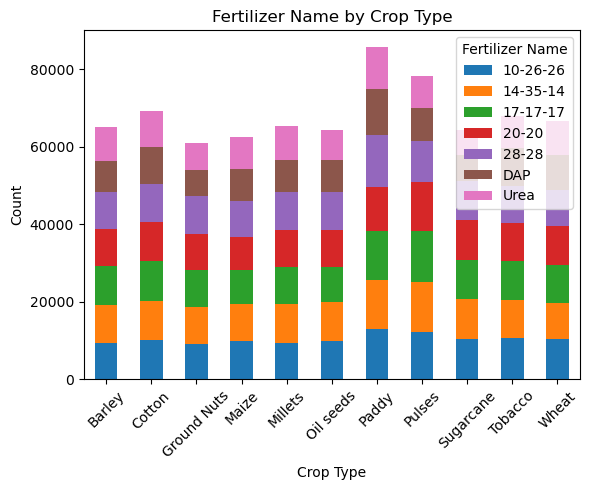


📊 Fertilizer Name by Fertilizer Name


Fertilizer Name  10-26-26  14-35-14  17-17-17   20-20   28-28    DAP   Urea
Fertilizer Name                                                            
10-26-26           113887         0         0       0       0      0      0
14-35-14                0    114436         0       0       0      0      0
17-17-17                0         0    112453       0       0      0      0
20-20                   0         0         0  110889       0      0      0
28-28                   0         0         0       0  111158      0      0
DAP                     0         0         0       0       0  94860      0
Urea                    0         0         0       0       0      0  92317

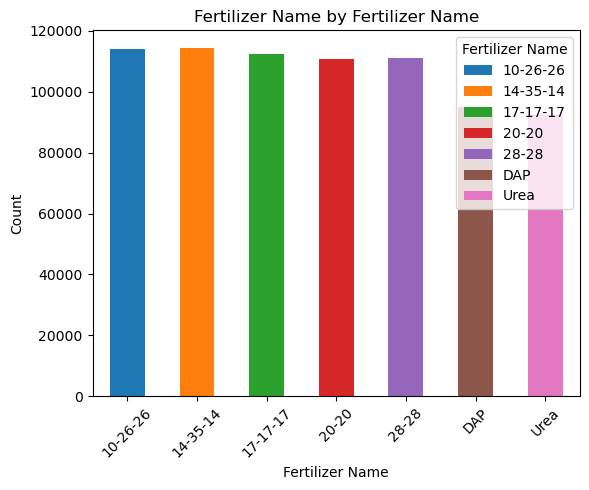

In [7]:
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns = [col for col in categorical_columns if col != 'Id']

for col in categorical_columns:
    print(f"\n📊 Fertilizer Name by {col}")
    pivot = pd.pivot_table(
        df,
        index=col,
        columns='Fertilizer Name',
        aggfunc='size',
        fill_value=0
    )
    display(pivot)

    pivot.plot(kind='bar', stacked=True, figsize=(6, 5))
    plt.title(f"Fertilizer Name by {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Visualization Numerical Columns and Fertilizer Name

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Fertilizer Label'] = le.fit_transform(df['Fertilizer Name'])

label_to_name = dict(zip(le.transform(le.classes_), le.classes_))

def visualize_strong_correlations(df, target='Fertilizer Label', threshold=0.5):
    numerical_columns = df.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if col != 'Id' and col != target]

    correlations = df[numerical_columns + [target]].corr()[target].drop(target)
    strong_corrs = correlations[correlations.abs() >= threshold].sort_values(key=abs, ascending=False)

    if not strong_corrs.empty:
        print(f"📈 Numerical columns with strong correlation (|r| ≥ {threshold}) with {target}:\n")
        for col, corr in strong_corrs.items():
            print(f" - {col}: correlation = {corr:.2f}")
            
            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=df, x=col, y=target, alpha=0.5)
            plt.yticks(
                ticks=sorted(df[target].unique()),
                labels=[label_to_name[i] for i in sorted(df[target].unique())]
            )
            plt.title(f"{target} vs {col}\nCorrelation = {corr:.2f}")
            plt.tight_layout()
            plt.show()
    else:
        print(f"No numerical columns found with correlation above |{threshold}| with {target}.")

visualize_strong_correlations(df)

No numerical columns found with correlation above |0.5| with Fertilizer Label.


#### Heatmap Correlation with Fertilizer Label

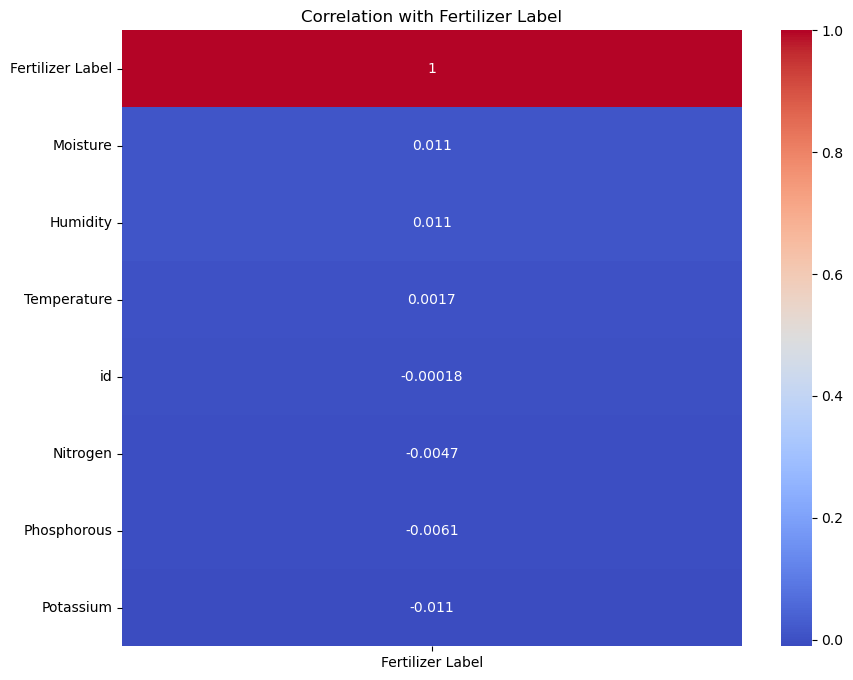

In [9]:
numerical_columns = df.select_dtypes(include='number').columns
corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['Fertilizer Label']].sort_values(by='Fertilizer Label', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Fertilizer Label")
plt.show()


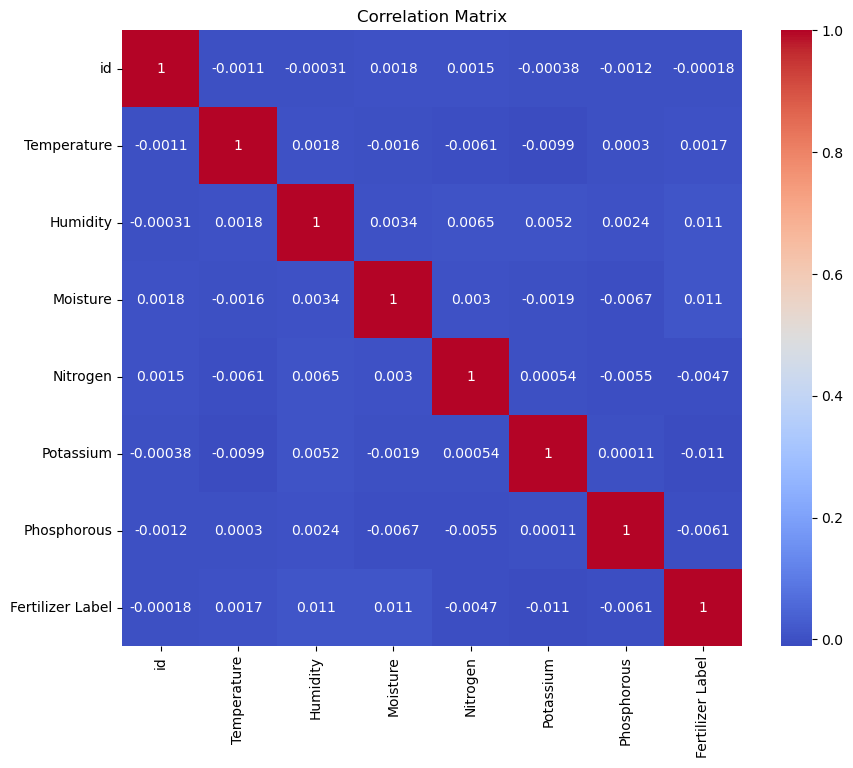

In [10]:
# correlation matrix

corr_num = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_num, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Box Plots Numerical Columns and Fertilizer Name

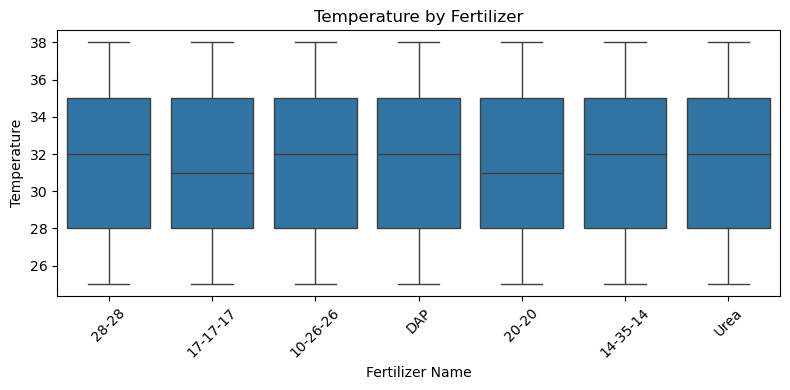

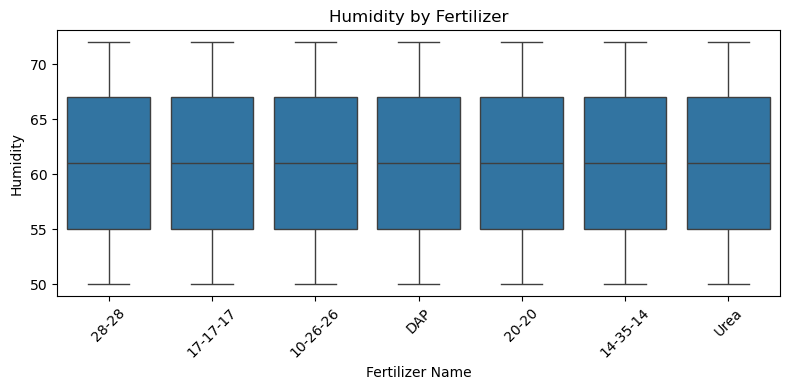

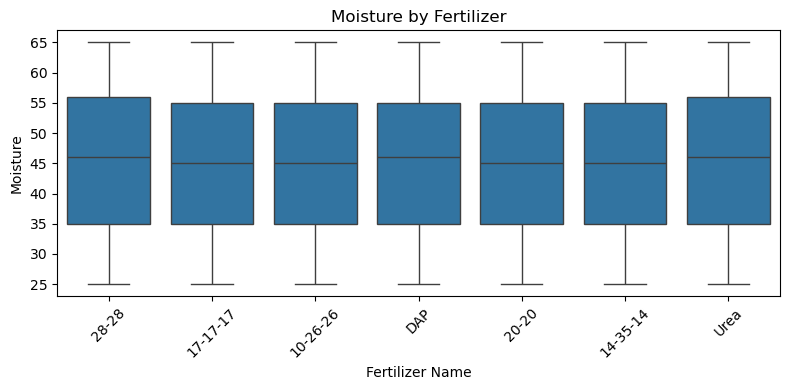

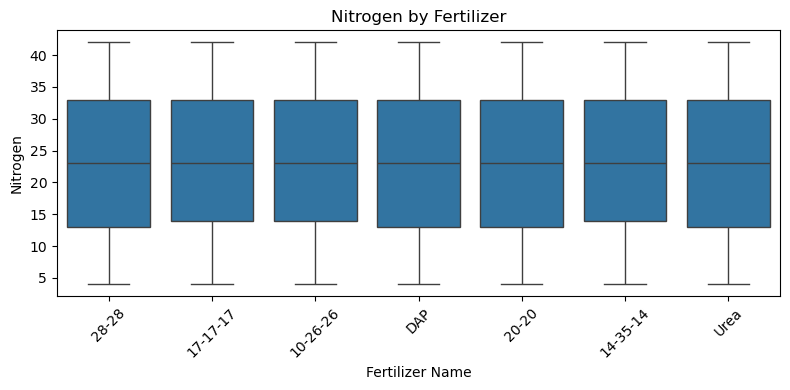

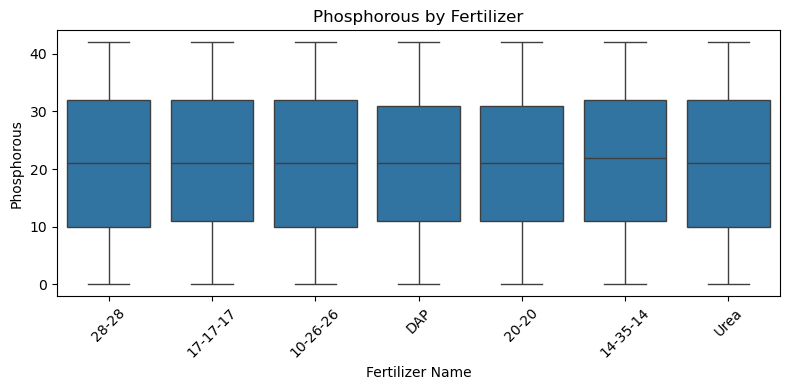

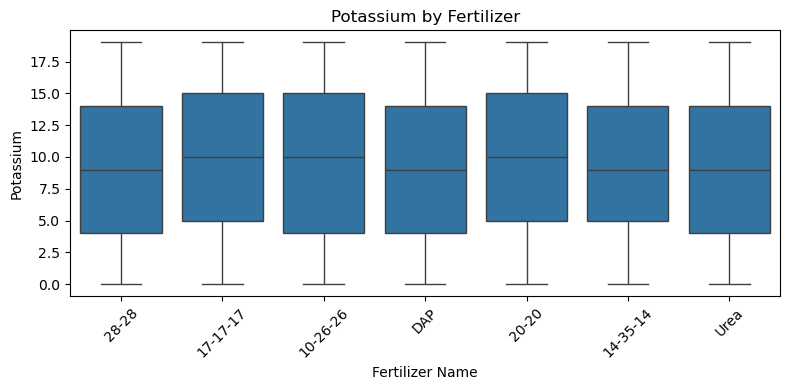

In [12]:
for col in ['Temperature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Fertilizer Name', y=col)
    plt.title(f'{col} by Fertilizer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Feature Engineering

#### Chi-squared Test and Cramer's V

In [14]:
from scipy.stats import chi2_contingency

categorical_features = ['Soil Type', 'Crop Type']
categorical_target = 'Fertilizer Name'

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    v = np.sqrt(phi2 / min(k - 1, r - 1))
    return v



--- Chi-squared Test and Cramer's V Results (Categorical Feature vs. Categorical Target) ---
Feature: Soil Type
  Chi2 Statistic: 923.33
  P-value: 0.000
  Conclusion: Reject Null Hypothesis. There is a significant association between Soil Type and 'Fertilizer Name'.
  Cramer's V: 0.018
  Strength: Negligible/Very Weak
------------------------------


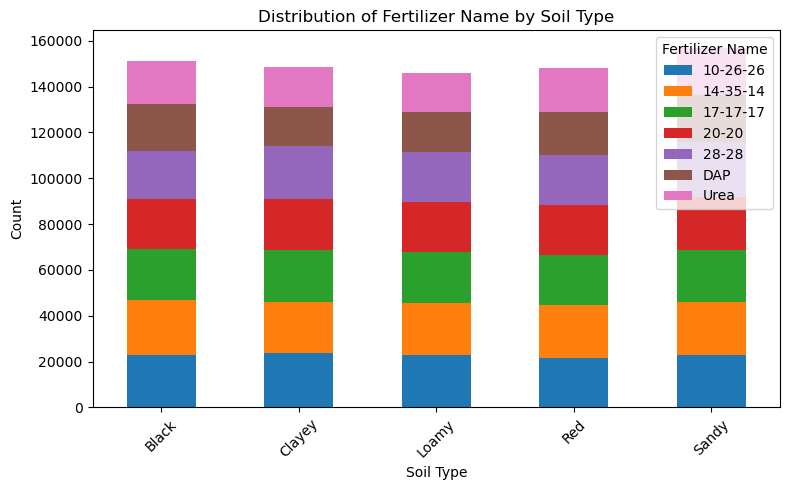

Feature: Crop Type
  Chi2 Statistic: 3094.46
  P-value: 0.000
  Conclusion: Reject Null Hypothesis. There is a significant association between Crop Type and 'Fertilizer Name'.
  Cramer's V: 0.026
  Strength: Negligible/Very Weak
------------------------------


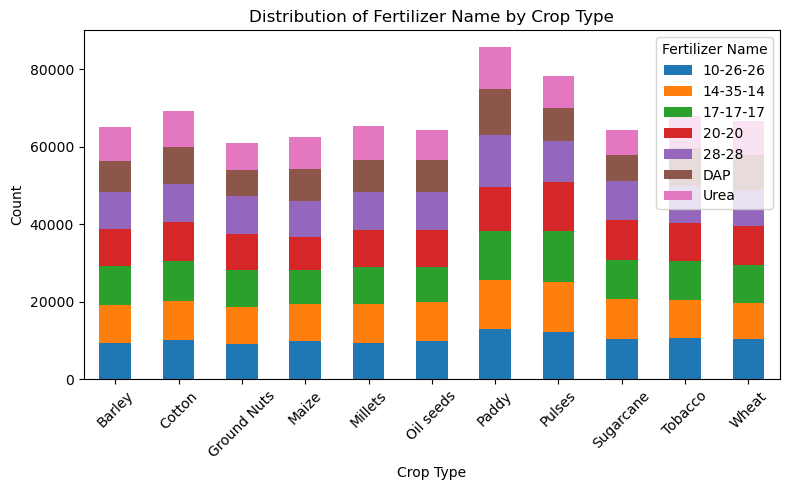

In [16]:
print("\n--- Chi-squared Test and Cramer's V Results (Categorical Feature vs. Categorical Target) ---")
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[categorical_target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    c_v = cramers_v(df[feature], df[categorical_target])

    print(f"Feature: {feature}")
    print(f"  Chi2 Statistic: {chi2:.2f}")
    print(f"  P-value: {p_value:.3f}")
    if p_value < 0.05:
        print(f"  Conclusion: Reject Null Hypothesis. There is a significant association between {feature} and '{categorical_target}'.")
    else:
        print(f"  Conclusion: Fail to Reject Null Hypothesis. No significant association between {feature} and '{categorical_target}'.")
    print(f"  Cramer's V: {c_v:.3f}")
    if c_v < 0.1:
        print("  Strength: Negligible/Very Weak")
    elif 0.1 <= c_v < 0.3:
        print("  Strength: Weak")
    elif 0.3 <= c_v < 0.5:
        print("  Strength: Moderate")
    else:
        print("  Strength: Strong")
    print("-" * 30)
    
    contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Distribution of {categorical_target} by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=categorical_target)
    plt.tight_layout()
    plt.show()

#### Create a Function to apply Feature Engineering

Feature engineering is the process of transforming raw data into features that make it easier for the machine learning model to understand patterns.In other words, feature engineering is the process of creating predictive model features.
Feature engineering is the process of selecting, manipulating and transforming raw data into features that can be used in supervised learning. It consists of five processes: feature creation, transformations, feature extraction, exploratory data analysis and benchmarking. 


In [101]:
def apply_feature_engineering(df):
    df["temperature_humidity"] = df["Temperature"] * df["Humidity"]
    df["humidity_moisture"] = df["Humidity"] * df["Moisture"]
    df["temperature_moisture"] = df["Temperature"] * df["Moisture"]
    df["NP_ratio"] = df["Nitrogen"] / df["Phosphorous"]
    df["NK_ratio"] = df["Nitrogen"] / df["Potassium"]
    df["PK_ratio"] = df["Phosphorous"] / df["Potassium"]
    df["Total_NPK"] = df["Nitrogen"] + df["Phosphorous"] + df["Potassium"]
    df["N_Proportion"] = df["Nitrogen"] / df["Total_NPK"]
    df["P_Proportion"] = df["Phosphorous"] / df["Total_NPK"]
    df["K_Proportion"] = df["Potassium"] / df["Total_NPK"]
    df["Temperature_Squared"] = df["Temperature"] ** 2
    df["Humidity_Squared"] = df["Humidity"] ** 2
    df["Moisture_Squared"] = df["Moisture"] ** 2
    df["Nitrogen_Squared"] = df["Nitrogen"] ** 2
    df["Phosphorous_Squared"] = df["Phosphorous"] ** 2
    df["Potassium_Squared"] = df["Potassium"] ** 2
    return df

df = apply_feature_engineering(df)

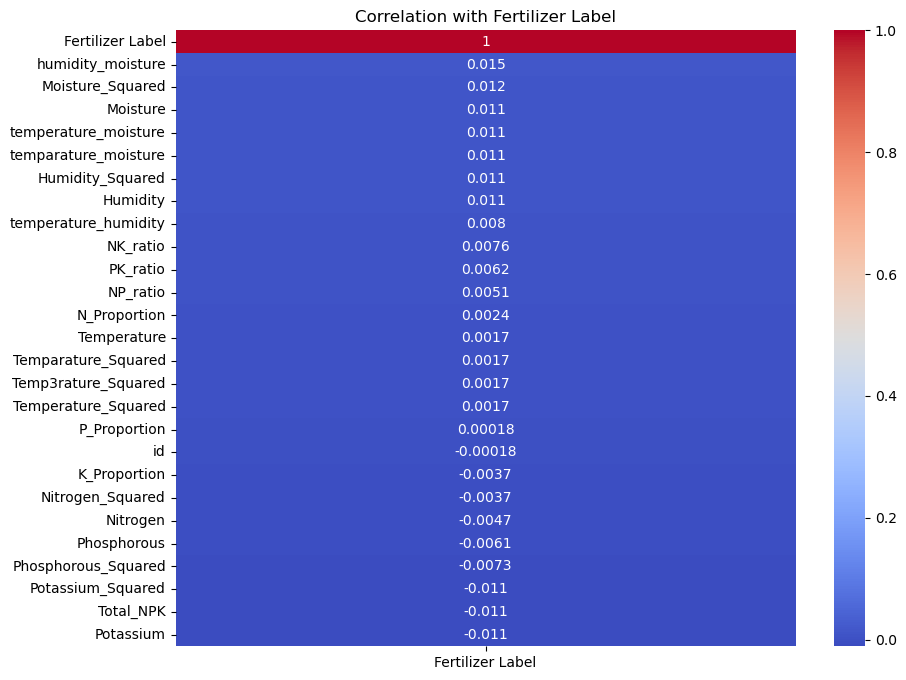

In [102]:
numerical_columns = df.select_dtypes(include='number').columns

corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['Fertilizer Label']].sort_values(by='Fertilizer Label', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Fertilizer Label")
plt.show()

### Modeling

In [66]:
df_test = pd.read_csv('test.csv')
df_test = apply_feature_engineering(df_test)
df_test.head()
df_test.columns

Index(['id', 'Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'temperature_humidity',
       'humidity_moisture', 'temperature_moisture', 'NP_ratio', 'NK_ratio',
       'PK_ratio', 'Total_NPK', 'N_Proportion', 'P_Proportion', 'K_Proportion',
       'Temp3rature_Squared', 'Humidity_Squared', 'Moisture_Squared',
       'Nitrogen_Squared', 'Phosphorous_Squared', 'Potassium_Squared'],
      dtype='object')

#### LightGBM
tree-based models 

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')

label_to_name = dict(zip(df['Fertilizer Label'], df['Fertilizer Name']))

original_features = [
    'Temperature', 'Humidity', 'Moisture',
    'Soil Type', 'Crop Type',
    'Nitrogen', 'Potassium', 'Phosphorous'
]
X = df[original_features]
y = df['Fertilizer Label']

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [68]:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

def clean_data(X, y):
    X = X.replace([np.inf, -np.inf], np.nan)
    y = y.replace([np.inf, -np.inf], np.nan)
    mask = ~X.isna().any(axis=1) & ~y.isna()
    return X.loc[mask], y.loc[mask]

X_train, y_train = clean_data(X_train, y_train)
X_val, y_val = clean_data(X_val, y_val)


In [69]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(objective='multiclass',
                                      num_class=len(label_to_name),
                                      random_state=42))
])


In [70]:
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")


X_test = df_test[original_features].copy()
test_ids = df_test['id']

X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.applymap(lambda x: np.nan if isinstance(x, (int, float)) and abs(x) > 1e10 else x)

for col in X_test.select_dtypes(include=[np.number]).columns:
    X_test[col].fillna(X_test[col].median(), inplace=True)

for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col].fillna('missing', inplace=True)

test_probabilities = model.predict_proba(X_test)

Validation Accuracy: 0.1886


In [71]:
class_labels = model.named_steps['classifier'].classes_

predictions = []
for probs in test_probabilities:
    top3_idx = np.argsort(probs)[::-1][:3]
    top3_names = [label_to_name[label] for label in class_labels[top3_idx]]
    predictions.append(" ".join(top3_names))

submission_df = pd.DataFrame({
    'id': test_ids,
    'Fertilizer Name': predictions
})

submission_df.to_csv('submission3.csv', index=False)
print("Submission saved.")
print(submission_df.head())

Submission saved.
       id             Fertilizer Name
0  750000              DAP 28-28 Urea
1  750001     17-17-17 10-26-26 20-20
2  750002     10-26-26 20-20 14-35-14
3  750003  14-35-14 17-17-17 10-26-26
4  750004     20-20 10-26-26 17-17-17


In [72]:
def mapk(actual, predicted, k=3):
    def apk(a, p, k):
        if a in p[:k]:
            return 1.0 / (p.index(a) + 1)
        return 0.0
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

val_probabilities = model.predict_proba(X_val)
class_labels = model.named_steps['classifier'].classes_

val_predictions = []
for probs in val_probabilities:
    top3_idx = np.argsort(probs)[::-1][:3]
    top3 = class_labels[top3_idx].tolist()
    val_predictions.append(top3)

map3_score = mapk(y_val.tolist(), val_predictions, k=3)
print(f"Validation MAP@3: {map3_score:.4f}")

Validation MAP@3: 0.3221


Mean Average Precision (MAP) is a ranking quality metric. It considers the number of relevant recommendations and their position in the list.MAP can take values from 0 to 1, where 1 corresponds to an ideal ranking with all relevant items at the top. Higher values of MAP mean better performance.

MAP@k (Mean Average Precision at k) is a metric used to evaluate the performance of ranking algorithms, particularly in information retrieval and recommendation systems. In the context of validation, MAP@k assesses how well a validation set is ranked according to a specific criterion. MAP@3, specifically, evaluates the ranking of the top 3 items in the validation set.
MAP (Mean Average Precision):
This metric calculates the average precision at each relevant item in a ranked list. Precision is the proportion of retrieved items that are relevant. For example, if you have 3 relevant items in a list of 5 retrieved items, and those 3 relevant items are at positions 1, 2, and 5, the precision at each relevant item would be 1, 1/2, and 3/5 respectively. The average precision is then the average of these precision values.

MAP@k:
This extends MAP by only considering the top k items in the ranked list. To compute the Average Precision (AP) at K, you must average the precision at each relevant position in the K-long ranked list.

In MAP@3, only the top 3 items are considered for calculating precision and averaging.

When validating a model, you're checking how well it predicts or ranks items in a held-out dataset (the validation set). MAP@3 would indicate how well your model ranks the top 3 relevant items in the validation set, which helps assess the model's ability to retrieve relevant information at the top of the ranked list. 

#### Optuna Parameter Tuning

In [44]:
import optuna
from optuna.integration import LightGBMPruningCallback

def objective(trial):
    param = {
        'objective': 'multiclass',
        'num_class': len(label_to_name),
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': 42
    }
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(**param))
    ])
    
    clf.fit(X_train, y_train)
    
    val_probs = clf.predict_proba(X_val)
    class_labels = clf.named_steps['classifier'].classes_

    val_top3 = []
    for probs in val_probs:
        top3 = class_labels[np.argsort(probs)[::-1][:3]].tolist()
        val_top3.append(top3)

    score = mapk(y_val.tolist(), val_top3, k=3)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-07-26 19:25:32,544] A new study created in memory with name: no-name-59c8b538-80cb-4ded-b5f2-dc7f7c3e8338
[I 2025-07-26 19:26:05,348] Trial 0 finished with value: 0.2999822222222222 and parameters: {'learning_rate': 0.002107633617455665, 'num_leaves': 148, 'max_depth': 11, 'min_child_samples': 32, 'subsample': 0.756083799072054, 'colsample_bytree': 0.6858118513804425, 'reg_alpha': 0.004494926282603356, 'reg_lambda': 3.9704940058337574e-05}. Best is trial 0 with value: 0.2999822222222222.
[I 2025-07-26 19:26:33,578] Trial 1 finished with value: 0.31978888888888896 and parameters: {'learning_rate': 0.023208097226630166, 'num_leaves': 89, 'max_depth': 10, 'min_child_samples': 91, 'subsample': 0.5779165523091718, 'colsample_bytree': 0.6141586048825685, 'reg_alpha': 4.4614531435362996e-07, 'reg_lambda': 0.14778732758972057}. Best is trial 1 with value: 0.31978888888888896.
[I 2025-07-26 19:26:47,604] Trial 2 finished with value: 0.3095577777777778 and parameters: {'learning_rate': 0

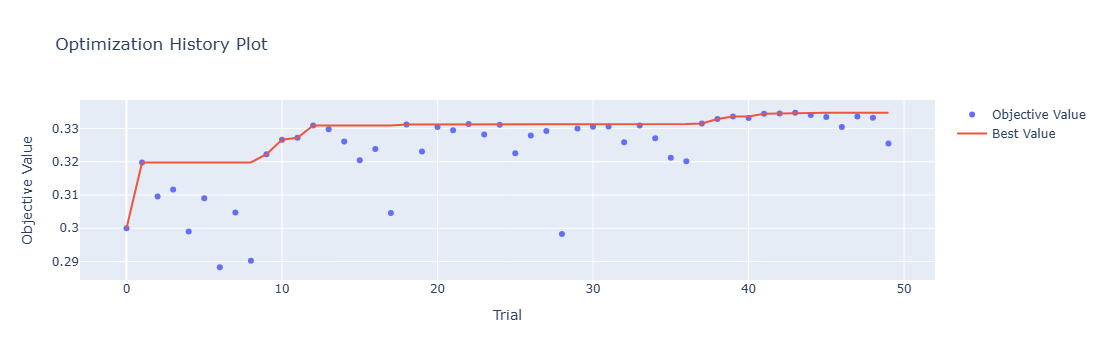

In [104]:
optuna.visualization.plot_optimization_history(study) 

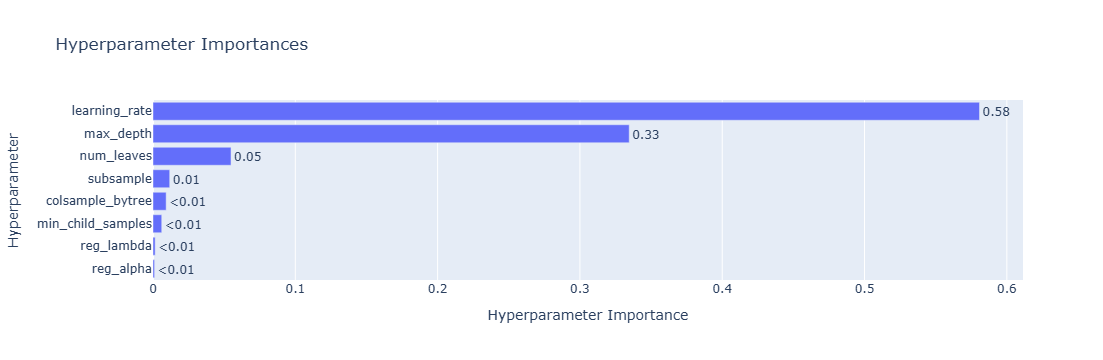

In [103]:
optuna.visualization.plot_param_importances(study) 

[I 2025-07-26 19:41:56,063] 
Trial 43 finished with value: 0.33475999999999995 
parameters: {'learning_rate': 0.11414993747415647, 
'num_leaves': 139, 
'max_depth': 12, 
'min_child_samples': 63, 
'subsample': 0.5034255248721904, 
'colsample_bytree': 0.5087964627609245, 
'reg_alpha': 0.0006265529800017632, 
'reg_lambda': 0.3982288233152685}. 
Best is trial 43 with value: 0.33475999999999995.

In [73]:
best_params = study.best_params
best_params['objective'] = 'multiclass'
best_params['num_class'] = len(label_to_name)
best_params['random_state'] = 42



final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(**best_params))
])

final_model.fit(X_train, y_train)
val_probs = final_model.predict_proba(X_val)
val_top3 = []
for probs in val_probs:
    top3 = class_labels[np.argsort(probs)[::-1][:3]].tolist()
    val_top3.append(top3)

print(f"MAP@3 after tuning: {mapk(y_val.tolist(), val_top3, k=3):.4f}")

MAP@3 after tuning: 0.3348


#### Amplify Dataset's values

In [79]:
df_fert = pd.read_csv('Fertilizer Prediction.csv')
df_combined = pd.concat([df, df_fert], axis=0)
le = LabelEncoder()
df_combined['Fertilizer Label'] = le.fit_transform(df_combined['Fertilizer Name'])
df_combined = apply_feature_engineering(df_combined)
df_combined.drop(columns=[
    'id', 'temperature_humidity', 'humidity_moisture', 
    'temperature_moisture', 'PK_ratio',
    'N_Proportion', 'P_Proportion', 'K_Proportion',
    'Temperature_Squared', 'Humidity_Squared', 'Moisture_Squared',
    'Nitrogen_Squared', 'Phosphorous_Squared', 'Potassium_Squared'
], inplace=True)
df_combined.isna().sum()

Temperature             100000
Humidity                     0
Moisture                     0
Soil Type                    0
Crop Type                    0
Nitrogen                     0
Potassium                    0
Phosphorous                  0
Fertilizer Name              0
Fertilizer Label             0
temparature_moisture    100000
NP_ratio                     0
NK_ratio                     0
Total_NPK                    0
Temparature_Squared     100000
Temp3rature_Squared     100000
Temparature             750000
dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import lightgbm as lgb

label_to_name = dict(zip(df_combined['Fertilizer Label'], df_combined['Fertilizer Name']))

original_features = [
    'Temperature', 'Humidity', 'Moisture',
    'Soil Type', 'Crop Type',
    'Nitrogen', 'Potassium', 'Phosphorous'
]
X = df_combined[original_features]
y = df_combined['Fertilizer Label']

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [81]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

def clean_data(X, y):
    X = X.replace([np.inf, -np.inf], np.nan)
    y = y.replace([np.inf, -np.inf], np.nan)
    mask = ~X.isna().any(axis=1) & ~y.isna()
    return X.loc[mask], y.loc[mask]

X_train, y_train = clean_data(X_train, y_train)
X_val, y_val = clean_data(X_val, y_val)


In [82]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(**best_params))
])

model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

Validation Accuracy: 0.2002


In [83]:
X_test = df_test[original_features].copy()
test_ids = df_test['id']

X_test = X_test.replace([np.inf, -np.inf], np.nan)
print(X_test.isna().sum())
X_test = X_test.applymap(lambda x: np.nan if isinstance(x, (int, float)) and abs(x) > 1e10 else x)
print(X_test.isna().sum())


Temperature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64
Temperature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64


In [84]:
for col in X_test.select_dtypes(include=[np.number]).columns:
    X_test[col].fillna(X_test[col].median(), inplace=True)

for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col].fillna('missing', inplace=True)

test_probabilities = model.predict_proba(X_test)

class_labels = model.named_steps['classifier'].classes_

predictions = []
for probs in test_probabilities:
    top3_idx = np.argsort(probs)[::-1][:3]
    top3_names = [label_to_name[label] for label in class_labels[top3_idx]]
    predictions.append(" ".join(top3_names))

submission_df = pd.DataFrame({
    'id': test_ids,
    'Fertilizer Name': predictions
})

submission_df.to_csv('submission6.csv', index=False)
print("Submission saved.")
print(submission_df.head())


Submission saved.
       id          Fertilizer Name
0  750000       DAP 10-26-26 20-20
1  750001  17-17-17 20-20 10-26-26
2  750002  20-20 14-35-14 10-26-26
3  750003   14-35-14 17-17-17 Urea
4  750004     20-20 10-26-26 28-28


In [85]:
def mapk(actual, predicted, k=3):
    def apk(a, p, k):
        if a in p[:k]:
            return 1.0 / (p.index(a) + 1)
        return 0.0
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])


val_probabilities = model.predict_proba(X_val)
class_labels = model.named_steps['classifier'].classes_

val_predictions = []
for probs in val_probabilities:
    top3_idx = np.argsort(probs)[::-1][:3]
    top3 = class_labels[top3_idx].tolist()
    val_predictions.append(top3)

map3_score = mapk(y_val.tolist(), val_predictions, k=3)
print(f"Validation MAP@3: {map3_score:.4f}")

Validation MAP@3: 0.3356


MAP@3 improved furthermore after combining both Datasets.

### XGBoost

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import xgboost as xgb

label_to_name = dict(zip(df_combined['Fertilizer Label'], df_combined['Fertilizer Name']))

original_features = [
    'Temperature', 'Humidity', 'Moisture',
    'Soil Type', 'Crop Type',
    'Nitrogen', 'Potassium', 'Phosphorous'
]
X = df_combined[original_features]
y = df_combined['Fertilizer Label']

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [87]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

def clean_data(X, y):
    X = X.replace([np.inf, -np.inf], np.nan)
    y = y.replace([np.inf, -np.inf], np.nan)
    mask = ~X.isna().any(axis=1) & ~y.isna()
    return X.loc[mask], y.loc[mask]

X_train, y_train = clean_data(X_train, y_train)
X_val, y_val = clean_data(X_val, y_val)

In [88]:
if 'best_params' not in locals():
    best_params_xgb = {
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'num_class': len(np.unique(y_train)),
        'n_estimators': 500,
        'learning_rate': 0.05,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'use_label_encoder': False,
        'random_state': 42
    }
else:
    best_params_xgb = best_params.copy()
    if 'n_estimators' in best_params_xgb:
        best_params_xgb['n_estimators'] = best_params_xgb['n_estimators']
    if 'objective' not in best_params_xgb:
        best_params_xgb['objective'] = 'multi:softprob'
    if 'eval_metric' not in best_params_xgb:
        best_params_xgb['eval_metric'] = 'mlogloss'
    if 'num_class' not in best_params_xgb:
        best_params_xgb['num_class'] = len(np.unique(y_train))
    if 'use_label_encoder' not in best_params_xgb:
        best_params_xgb['use_label_encoder'] = False
    if 'random_state' not in best_params_xgb:
        best_params_xgb['random_state'] = 42
        

In [89]:
model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(**best_params_xgb))
])

model_xgb.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Humidity',
                                                   'Moisture', 'Nitrogen',
                                                   'Potassium',
                                                   'Phosphorous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Soil Type',
                                                   'Crop Type'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.11414993747415647, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=12,
                               max_leaves=None, min_child_samples=63,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, ...))])

In [90]:
y_val_pred = model_xgb.predict(X_val)
print(f"Validation Accuracy (XGBoost): {accuracy_score(y_val, y_val_pred):.4f}")

X_test = df_test[original_features].copy()
test_ids = df_test['id']

X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.applymap(lambda x: np.nan if isinstance(x, (int, float)) and abs(x) > 1e10 else x)

Validation Accuracy (XGBoost): 0.1956


In [91]:
for col in X_test.select_dtypes(include=[np.number]).columns:
    X_test[col].fillna(X_test[col].median(), inplace=True)

for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col].fillna('missing', inplace=True)

test_probabilities = model_xgb.predict_proba(X_test)

class_labels = model_xgb.named_steps['classifier'].classes_

In [92]:
predictions = []
for probs in test_probabilities:
    top3_idx = np.argsort(probs)[::-1][:3]
    top3_names = [label_to_name[label] for label in class_labels[top3_idx]]
    predictions.append(" ".join(top3_names))

submission_df = pd.DataFrame({
    'id': test_ids,
    'Fertilizer Name': predictions
})

submission_df.to_csv('submission_xgboost.csv', index=False)
print("Submission saved.")
print(submission_df.head())


Submission saved.
       id          Fertilizer Name
0  750000       DAP 20-20 10-26-26
1  750001      17-17-17 20-20 Urea
2  750002     20-20 28-28 17-17-17
3  750003   14-35-14 17-17-17 Urea
4  750004  20-20 10-26-26 17-17-17


In [93]:
def mapk(actual, predicted, k=3):
    def apk(a, p, k):
        if a in p[:k]:
            return 1.0 / (p.index(a) + 1)
        return 0.0
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

val_probabilities = model_xgb.predict_proba(X_val)
class_labels = model_xgb.named_steps['classifier'].classes_

val_predictions = []
for probs in val_probabilities:
    top3_idx = np.argsort(probs)[::-1][:3]
    top3 = class_labels[top3_idx].tolist()
    val_predictions.append(top3)

map3_score = mapk(y_val.tolist(), val_predictions, k=3)
print(f"Validation MAP@3 (XGBoost): {map3_score:.4f}")

Validation MAP@3 (XGBoost): 0.3303


MAP@3 is pretty good. Nevertheless, it is lower than the previous lightGBM  model's score.

